In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import netCDF4
import numpy as np
from mpl_toolkits.basemap import Basemap
import datetime as dt
from netCDF4 import num2date, date2num

In [2]:
fp='amip.nc'
amip = netCDF4.Dataset(fp)
plt.show()
print(amip)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.7 CMIP-6.2
    activity_id: CMIP
    branch_method: no parent
    branch_time_in_child: 0.0
    branch_time_in_parent: 0.0
    comment: The experiment starts from January 1979 to December 2014 under the evolving, externally imposed forcings and boundary conditions downloaded from CMIP6 websites. The initial status is from year 28 of a control run under the observed forcing at 1979.
    contact: Dr. Tongwen Wu(twwu@cma.gov.cn)
    creation_date: 2020-07-20T03:13:13Z
    data_specs_version: 01.00.27
    description: DECK: amip
    experiment: AMIP
    experiment_id: amip
    external_variables: areacella
    forcing_index: 1
    frequency: mon
    further_info_url: https://furtherinfo.es-doc.org/CMIP6.BCC.BCC-CSM2-MR.amip.none.r1i1p1f1
    grid: T106
    grid_label: gn
    history: 2020-07-20T03:13:13Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and 

In [3]:
for var in amip.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    units: days since 1979-01-01
    calendar: 365_day
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: time
current shape = (432,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (432, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    bounds: lat_bnds
    units: degrees_north
    axis: Y
    long_name: latitude
    standard_name: latitude
unlimited dimensions: 
current shape = (160,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat_bnds(lat, bnds)
unlimited dimensions: 
current shape = (160, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    bounds: lon_bnds
    u

In [5]:
lat_amip = amip['lat'][:]
lon_amip = amip['lon'][:]
time_amip=amip['time'][:]
time_amip_units=amip['time'].units
pr_amip_var=amip['pr'][0,:,:]
pr_amip_units=amip['pr'].units

print(time_amip_units)
print(pr_amip_units)

days since 1979-01-01
kg m-2 s-1


In [6]:
time_amip_units=amip['time'].units
time_amip_cal = amip['time'].calendar
print(time_amip_cal)

dates = num2date(time_amip[:],units=time_amip_units,calendar=time_amip_cal)
print("dates corresponding to time values:\n{}".format(dates))


365_day
dates corresponding to time values:
[cftime.DatetimeNoLeap(1979, 1, 16, 12, 0, 0, 0)
 cftime.DatetimeNoLeap(1979, 2, 15, 0, 0, 0, 0)
 cftime.DatetimeNoLeap(1979, 3, 16, 12, 0, 0, 0)
 cftime.DatetimeNoLeap(1979, 4, 16, 0, 0, 0, 0)
 cftime.DatetimeNoLeap(1979, 5, 16, 12, 0, 0, 0)
 cftime.DatetimeNoLeap(1979, 6, 16, 0, 0, 0, 0)
 cftime.DatetimeNoLeap(1979, 7, 16, 12, 0, 0, 0)
 cftime.DatetimeNoLeap(1979, 8, 16, 12, 0, 0, 0)
 cftime.DatetimeNoLeap(1979, 9, 16, 0, 0, 0, 0)
 cftime.DatetimeNoLeap(1979, 10, 16, 12, 0, 0, 0)
 cftime.DatetimeNoLeap(1979, 11, 16, 0, 0, 0, 0)
 cftime.DatetimeNoLeap(1979, 12, 16, 12, 0, 0, 0)
 cftime.DatetimeNoLeap(1980, 1, 16, 12, 0, 0, 0)
 cftime.DatetimeNoLeap(1980, 2, 15, 0, 0, 0, 0)
 cftime.DatetimeNoLeap(1980, 3, 16, 12, 0, 0, 0)
 cftime.DatetimeNoLeap(1980, 4, 16, 0, 0, 0, 0)
 cftime.DatetimeNoLeap(1980, 5, 16, 12, 0, 0, 0)
 cftime.DatetimeNoLeap(1980, 6, 16, 0, 0, 0, 0)
 cftime.DatetimeNoLeap(1980, 7, 16, 12, 0, 0, 0)
 cftime.DatetimeNoLeap(1980, 8

In [7]:
prmm=pr_amip_var*86400
print(np.squeeze(prmm))

[[0.14106764 0.1461828  0.14547561 ... 0.13998128 0.15187271 0.1407943 ]
 [0.1552597  0.15537393 0.15498866 ... 0.15483964 0.15581876 0.15575613]
 [0.14155344 0.1404114  0.14016267 ... 0.14173051 0.14168843 0.1418728 ]
 ...
 [0.76060766 0.74413973 0.72205488 ... 0.86946736 0.86331366 0.8037474 ]
 [0.57981456 0.57825879 0.58075996 ... 0.62183037 0.6187556  0.60332062]
 [0.39964108 0.40346432 0.40377189 ... 0.40895874 0.40229077 0.39606595]]


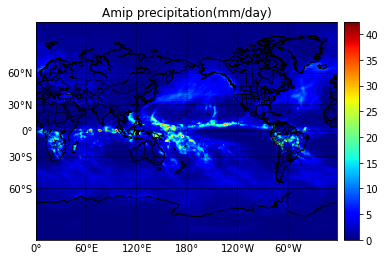

In [8]:
m=Basemap(projection='mill',lat_ts=10, \
  llcrnrlon=lon_amip.min(),urcrnrlon=lon_amip.max(), \
  llcrnrlat=lat_amip.min(),urcrnrlat=lat_amip.max(), \
  resolution='c')

Lon, Lat = np.meshgrid(lon_amip,lat_amip)
x, y = m(Lon,Lat)

cs = m.pcolormesh(x,y,np.squeeze(prmm),shading='flat', \
  cmap=plt.cm.jet)

m.drawcoastlines()
#m.fillcontinents()
#m.drawmapboundary()
m.drawstates()
m.drawcountries()
m.drawparallels(np.arange(-90.,120.,30.), \
  labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.), \
  labels=[0,0,0,1])

m.colorbar(cs)
plt.title('Amip precipitation(mm/day)')
plt.show()


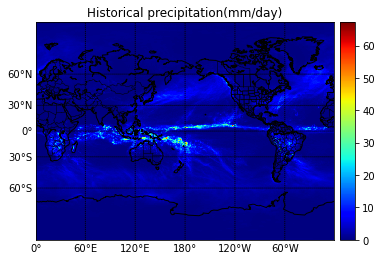

In [9]:
fp='hist1950_2020.nc'
hist = netCDF4.Dataset(fp)
plt.show()
lat_hist = hist['lat'][:]
lon_hist = hist['lon'][:]
time_hist=hist['time'][:]
pr_hist_var=hist['pr'][0,:,:]
pr_hist_units=hist['pr'].units
pr_hist_mm=pr_hist_var*86400

m=Basemap(projection='mill',lat_ts=10, \
  llcrnrlon=lon_hist.min(),urcrnrlon=lon_hist.max(), \
  llcrnrlat=lat_hist.min(),urcrnrlat=lat_hist.max(), \
  resolution='c')

Lon_hist, Lat_hist = np.meshgrid(lon_hist,lat_hist)
x_hist, y_hist = m(Lon_hist,Lat_hist)

cs = m.pcolormesh(x_hist,y_hist,np.squeeze(pr_hist_mm),shading='flat', \
  cmap=plt.cm.jet)

m.drawcoastlines()
#m.fillcontinents()
#m.drawmapboundary()
m.drawstates()
m.drawcountries()
m.drawparallels(np.arange(-90.,120.,30.), \
  labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.), \
  labels=[0,0,0,1])

m.colorbar(cs)
plt.title('Historical precipitation(mm/day)')
plt.show()



In [19]:
#stroing the lat and lon of Beijing
lat_Beijing=39.916668
lon_Beijing=116.383331

#square difference of lat and lon
sq_diff_lat=(lat_amip-lat_Beijing)**2
sq_diff_lon=(lon_amip-lon_Beijing)**2

#identifying the index of minimum value for lat and lon
min_index_lat=sq_diff_lat.argmin()
min_index_lon=sq_diff_lon.argmin()

#creating a pandas dataframe
dates = num2date(time_amip[:],units=time_amip_units)
starting_date=amip['time'].units[11:0]+'1979-01-16'
ending_date=amip['time'].units[11:0]+'2014-12-07'
date_range=pd.date_range(start=starting_date,end=ending_date,freq='30D')

df=pd.DataFrame(0,columns=['Precipitation'],index=date_range)
dt=np.arange(0,amip['time'].size)

for time_index in dt:
    df.iloc[time_index]=prmm[time_index,min_index_lat,min_index_lon]

IndexError: too many indices for array

In [20]:
print(starting_date)
print(ending_date)
print(dates[-1])
print(date_range)
print(dates.size)
print(df.iloc[1])

1979-01-16
2014-12-07
2014-12-07 12:00:00
DatetimeIndex(['1979-01-16', '1979-02-15', '1979-03-17', '1979-04-16',
               '1979-05-16', '1979-06-15', '1979-07-15', '1979-08-14',
               '1979-09-13', '1979-10-13',
               ...
               '2014-02-11', '2014-03-13', '2014-04-12', '2014-05-12',
               '2014-06-11', '2014-07-11', '2014-08-10', '2014-09-09',
               '2014-10-09', '2014-11-08'],
              dtype='datetime64[ns]', length=437, freq='30D')
432
Precipitation    0
Name: 1979-02-15 00:00:00, dtype: int64


In [12]:
for var in hist.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
>f8 time(time)
    bounds: time_bnds
    units: days since 1950-01-01
    calendar: 365_day
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: time
current shape = (612,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
>f8 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (612, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
>f8 lat(lat)
    bounds: lat_bnds
    units: degrees_north
    axis: Y
    long_name: latitude
    standard_name: latitude
unlimited dimensions: 
current shape = (400,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
>f8 lat_bnds(lat, bnds)
unlimited dimensions: 
current shape = (400, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
>f8 lon(lon)
    bounds: lon_bnds
    units: degrees_east
 

In [13]:
time_hist_units=hist['time'].units
time_hist_cal = hist['time'].calendar
print(time_hist_cal)

dates = num2date(time_hist[:],units=time_hist_units)
#print("dates corresponding to time values:\n{}".format(dates))
print(dates)

365_day
[cftime.DatetimeGregorian(1950, 1, 16, 12, 0, 0, 0)
 cftime.DatetimeGregorian(1950, 2, 15, 0, 0, 0, 0)
 cftime.DatetimeGregorian(1950, 3, 16, 12, 0, 0, 0)
 cftime.DatetimeGregorian(1950, 4, 16, 0, 0, 0, 0)
 cftime.DatetimeGregorian(1950, 5, 16, 12, 0, 0, 0)
 cftime.DatetimeGregorian(1950, 6, 16, 0, 0, 0, 0)
 cftime.DatetimeGregorian(1950, 7, 16, 12, 0, 0, 0)
 cftime.DatetimeGregorian(1950, 8, 16, 12, 0, 0, 0)
 cftime.DatetimeGregorian(1950, 9, 16, 0, 0, 0, 0)
 cftime.DatetimeGregorian(1950, 10, 16, 12, 0, 0, 0)
 cftime.DatetimeGregorian(1950, 11, 16, 0, 0, 0, 0)
 cftime.DatetimeGregorian(1950, 12, 16, 12, 0, 0, 0)
 cftime.DatetimeGregorian(1951, 1, 16, 12, 0, 0, 0)
 cftime.DatetimeGregorian(1951, 2, 15, 0, 0, 0, 0)
 cftime.DatetimeGregorian(1951, 3, 16, 12, 0, 0, 0)
 cftime.DatetimeGregorian(1951, 4, 16, 0, 0, 0, 0)
 cftime.DatetimeGregorian(1951, 5, 16, 12, 0, 0, 0)
 cftime.DatetimeGregorian(1951, 6, 16, 0, 0, 0, 0)
 cftime.DatetimeGregorian(1951, 7, 16, 12, 0, 0, 0)
 cftime.D

In [14]:
dates_hist = num2date(time_hist[:],units=time_hist_units)
starting_date_hist=hist['time'].units[11:0]+'1950-01-16'
ending_date_hist=hist['time'].units[11:0]+'2000-12-03'
date_range_hist=pd.date_range(start=starting_date_hist,end=ending_date_hist,freq='30D')
print(starting_date_hist)
print(ending_date_hist)
print(date_range_hist)
print(dates_hist.size)

1950-01-16
2000-12-03
DatetimeIndex(['1950-01-16', '1950-02-15', '1950-03-17', '1950-04-16',
               '1950-05-16', '1950-06-15', '1950-07-15', '1950-08-14',
               '1950-09-13', '1950-10-13',
               ...
               '2000-02-23', '2000-03-24', '2000-04-23', '2000-05-23',
               '2000-06-22', '2000-07-22', '2000-08-21', '2000-09-20',
               '2000-10-20', '2000-11-19'],
              dtype='datetime64[ns]', length=620, freq='30D')
612
